In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers

權重初始化(請改變activation functione 觀察各層輸出結果)

1.RandomNormal (std 1 )

In [2]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'relu', False, initializers.RandomNormal(0, 1))(inputs)
x2 = layers.Dense(100, 'relu', False, initializers.RandomNormal(0, 1))(x1)
x3 = layers.Dense(100, 'relu', False, initializers.RandomNormal(0, 1))(x2)
x4 = layers.Dense(100, 'relu', False, initializers.RandomNormal(0, 1))(x3)
x5 = layers.Dense(100, 'relu', False, initializers.RandomNormal(0, 1))(x4)
model_1 = keras.Model(inputs, [x1, x2, x3, x4, x5])

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step


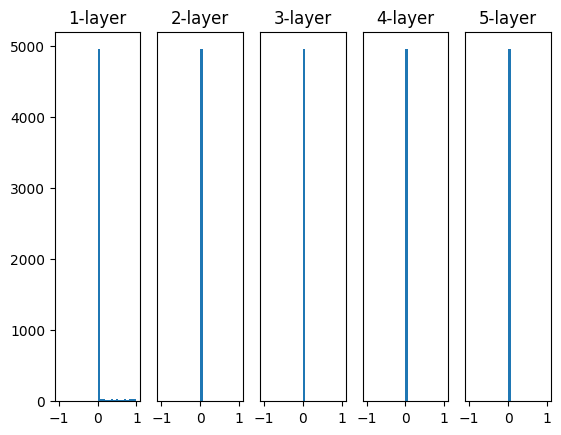

In [3]:
x = np.random.randn(100, 100)
outputs = model_1.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[-1,1])  # 畫出值方圖
plt.show()

2. RandomNormal (std 0.01 )

In [4]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'relu', False, initializers.RandomNormal(0, 0.01))(inputs)
x2 = layers.Dense(100, 'relu', False, initializers.RandomNormal(0, 0.01))(x1)
x3 = layers.Dense(100, 'relu', False, initializers.RandomNormal(0, 0.01))(x2)
x4 = layers.Dense(100, 'relu', False, initializers.RandomNormal(0, 0.01))(x3)
x5 = layers.Dense(100, 'relu', False, initializers.RandomNormal(0, 0.01))(x4)
model_2 = keras.Model(inputs, [x1, x2, x3, x4, x5])

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step


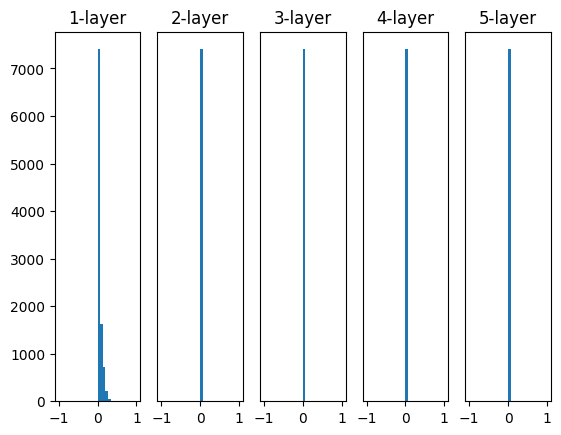

In [5]:
x = np.random.randn(100, 100)
outputs = model_2.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[-1,1])  # 畫出值方圖
plt.show()

4. Xavier/Glorot Initialization (tanh)

In [6]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'tanh', False, initializers.glorot_normal())(inputs)
x2 = layers.Dense(100, 'tanh', False, initializers.glorot_normal())(x1)
x3 = layers.Dense(100, 'tanh', False, initializers.glorot_normal())(x2)
x4 = layers.Dense(100, 'tanh', False, initializers.glorot_normal())(x3)
x5 = layers.Dense(100, 'tanh', False, initializers.glorot_normal())(x4)
model_4 = keras.Model(inputs, [x1, x2, x3, x4, x5])

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step


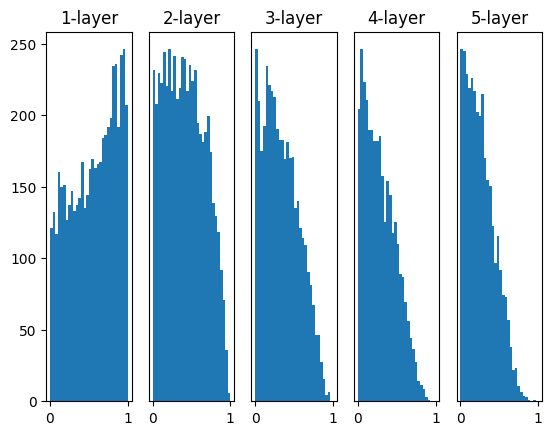

In [7]:
x = np.random.randn(100, 100)
outputs = model_4.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

5. He initialization

In [8]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'tanh', False, initializers.he_normal())(inputs)
x2 = layers.Dense(100, 'tanh', False, initializers.he_normal())(x1)
x3 = layers.Dense(100, 'tanh', False, initializers.he_normal())(x2)
x4 = layers.Dense(100, 'tanh', False, initializers.he_normal())(x3)
x5 = layers.Dense(100, 'tanh', False, initializers.he_normal())(x4)
model_5 = keras.Model(inputs, [x1, x2, x3, x4, x5])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


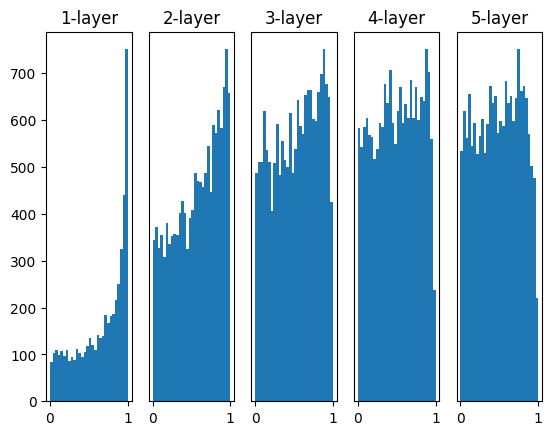

In [9]:
x = np.random.randn(100, 100)
outputs = model_5.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

使用mnist數據集實驗證三種權重初始化方法

In [10]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

## Load Dataset
- MNIST dataset
- source: http://yann.lecun.com/exdb/mnist/

In [27]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [29]:
print(X_train.dtype)
print(X_train.shape)

uint8
(60000, 28, 28)


In [30]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1001, stratify=y_train)
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)
print(y_train[:10]) # x[0, :5, :5, 0]

(48000, 28, 28, 1) (12000, 28, 28, 1) (10000, 28, 28, 1)
(48000,) (12000,) (10000,)
[2 0 0 4 3 3 7 5 7 7]


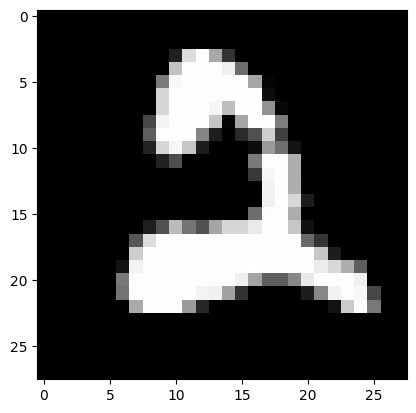

Label:  2


In [31]:
plt.imshow(X_train[0],  cmap="gray")    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

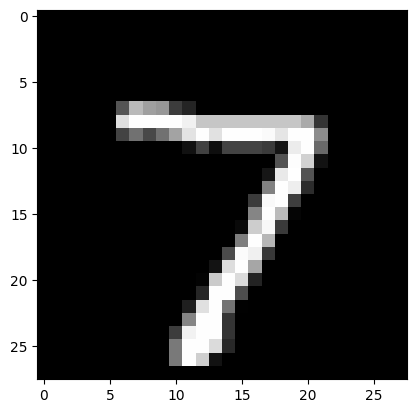

Label:  7


In [32]:
plt.imshow(X_test[0],  cmap="gray")    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

In [33]:
# Convert to tf.data.Dataset.from_tensor_slices
X_train = tf.data.Dataset.from_tensor_slices(X_train)
X_val = tf.data.Dataset.from_tensor_slices(X_val)
X_test = tf.data.Dataset.from_tensor_slices(X_test)
y_train = tf.data.Dataset.from_tensor_slices(y_train.reshape(-1)) # reshape(-1): 2-d to 1-d
y_val = tf.data.Dataset.from_tensor_slices(y_val.reshape(-1))
y_test = tf.data.Dataset.from_tensor_slices(y_test.reshape(-1))

In [34]:
# Convert to tf.data.Dataset.zip
train_data = tf.data.Dataset.zip({"x": X_train, "y": y_train})
val_data = tf.data.Dataset.zip({"x": X_val, "y": y_val})
test_data = tf.data.Dataset.zip({"x": X_test, "y": y_test})

In [35]:
def flip(x):
    """
    flip image(翻轉影像)
    """
    x = tf.image.random_flip_left_right(x)  # 隨機左右翻轉影像
    return x

def color(x):
    """
     Color change(改變顏色)
    """
    x = tf.image.random_hue(x, 0.08)  # 隨機調整影像色調
    x = tf.image.random_saturation(x, 0.6, 1.6)  # 隨機調整影像飽和度
    x = tf.image.random_brightness(x, 0.05)  # 隨機調整影像亮度
    x = tf.image.random_contrast(x, 0.7, 1.3)  # 隨機調整影像對比度
    return x

def rotate(x):
    """
    Rotation image(影像旋轉)
    """
    # 隨機選轉n次(通過minval和maxval設定n的範圍)，每次選轉90度
    x = tf.image.rot90(x, tf.random.uniform(shape=[], minval=1, maxval=4, dtype=tf.int32))
    return x

def zoom(x, scale_min=0.6, scale_max=1.4):
    """
    Zoom Image(影像縮放)
    """
    h, w, c = x.shape
    scale = tf.random.uniform([], scale_min, scale_max)  # 隨機縮放比例
    sh = h * scale  # 縮放後影像長度
    sw = w * scale  # 縮放後影像寬度
    x = tf.image.resize(x, (sh, sw))  # 影像縮放
    x = tf.image.resize_with_crop_or_pad(x, h, w)  # 影像裁減和填補
    return x

def parse_aug_fn(dataset):
    """
    Image Augmentation(影像增強) function
    """
    x = tf.cast(dataset['x'], tf.float32) / 255.  # 影像標準化
    # x = flip(x)  # 隨機水平翻轉
    # # 觸發顏色轉換機率50%
    # x = tf.cond(tf.random.uniform([], 0, 1) > 0.5, lambda: color(x), lambda: x) # tf.cond: tensorflow的if / else條件判斷式
    # # 觸發影像旋轉機率0.25%
    # x = tf.cond(tf.random.uniform([], 0, 1) > 0.75, lambda: rotate(x), lambda: x)
    # 觸發影像縮放機率50%
    x = tf.cond(tf.random.uniform([], 0, 1) > 0.5, lambda: zoom(x), lambda: x)
    # 將輸出標籤轉乘One-hot編碼
    y = tf.one_hot(dataset['y'], 10)
    return x, y

def parse_fn(dataset):
    x = tf.cast(dataset['x'], tf.float32) / 255. # casts a tensor to new type => (0,1)
    y = tf.one_hot(dataset['y'], 10) # one-hot => 2-d
    return x, y

In [38]:
AUTOTUNE = tf.data.experimental.AUTOTUNE  # 自動調整模式
batch_size = 64  # 批次大小

# 打散資料集
train_data = train_data.shuffle(buffer_size=10000)
# 載入預處理「parse_aug_fn」function，cpu數量為自動調整模式
train_data = train_data.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟（暫存空間為自動調整模式）
train_data = train_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

# 載入前面的資料愈處理function，cpu數量為自動調整模式
val_data = val_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)。
val_data = val_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

# 載入前面的資料愈處理function，cpu數量為自動調整模式
test_data = test_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)。
test_data = test_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

In [39]:
def build_and_train_model(run_name, init):
    """
    run_name:傳入目前執行的任務名子
    init:傳入網路層初始化化的方式
    """
    inputs = keras.Input(shape=(28, 28, 1))
    x = layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer=init)(inputs)
    x = layers.MaxPool2D()(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=init)(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=init)(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=init)(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer=init)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(16, activation='relu', kernel_initializer=init)(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    # 建立網路模型(將輸入到輸出所有經過的網路層連接起來)
    model = keras.Model(inputs, outputs)

    # 儲存最好的網路模型權重

    modelfiles = model_dir + '/{}-best-model.keras'.format(run_name)
    model_mckp = keras.callbacks.ModelCheckpoint(modelfiles,
                                                 monitor='val_categorical_accuracy',
                                                 save_best_only=True,
                                                 mode='max')
    es = keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', mode='max', patience=5)

    # 設定訓練使用的優化器、損失函數和指標函數
    model.compile(keras.optimizers.Adam(),
               loss=keras.losses.CategoricalCrossentropy(),
               metrics=[keras.metrics.CategoricalAccuracy()])

    # 訓練網路模型
    model.fit(train_data,
              validation_data=val_data,
              epochs=100,
              callbacks=[model_mckp, es])

In [40]:
session_num = 1
# 設定儲存權重目錄
model_dir = 'lab4-2-logs/models/'
os.makedirs(model_dir)
# 設定要測試的三種初始化方法
weights_initialization_list = [initializers.RandomNormal(0, 0.01),
                        initializers.glorot_normal(),
                        initializers.he_normal()]

for init in weights_initialization_list:
    print('--- Running training session %d' % (session_num))
    run_name = "run-%d" % session_num
    build_and_train_model(run_name, init)  # 創建和訓練網路
    session_num += 1

--- Running training session 1
Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - categorical_accuracy: 0.2908 - loss: 1.9039 - val_categorical_accuracy: 0.8698 - val_loss: 0.5846
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - categorical_accuracy: 0.6132 - loss: 1.0578 - val_categorical_accuracy: 0.9317 - val_loss: 0.2969
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - categorical_accuracy: 0.6687 - loss: 0.9023 - val_categorical_accuracy: 0.9515 - val_loss: 0.1914
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - categorical_accuracy: 0.6987 - loss: 0.8126 - val_categorical_accuracy: 0.9645 - val_loss: 0.1447
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - categorical_accuracy: 0.7132 - loss: 0.7702 - val_categorical_accuracy: 0.9668 - val_loss: 0.1221
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - categorical_accuracy: 0.7276 - loss: 0.7386 - val_categorical_accuracy: 0.9712 - val_loss: 0.1170
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 11

In [41]:
model_1 = keras.models.load_model('lab4-2-logs/models/run-1-best-model.keras')
model_2 = keras.models.load_model('lab4-2-logs/models/run-2-best-model.keras')
model_3 = keras.models.load_model('lab4-2-logs/models/run-3-best-model.keras')
loss_1, acc_1 = model_1.evaluate(test_data)
loss_2, acc_2 = model_2.evaluate(test_data)
loss_3, acc_3 = model_3.evaluate(test_data)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - categorical_accuracy: 0.9817 - loss: 0.0770
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - categorical_accuracy: 0.9915 - loss: 0.0372
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - categorical_accuracy: 0.9856 - loss: 0.0580


In [42]:
loss = [loss_1, loss_2, loss_3]
acc = [acc_1, acc_2, acc_3]

dict = {"Loss": loss,
        "Accuracy": acc}

df = pd.DataFrame(dict)
df

,Loss,Accuracy
0,0.064850,0.9857
1,0.033688,0.9926
2,0.046187,0.9888


## 4. Batch Normalization
- Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective
- Normalize each mini-batch before nonlinearity
- Doc: https://keras.io/optimizers/

<img src="https://raw.githubusercontent.com/torch/torch.github.io/master/blog/_posts/images/resnets_modelvariants.png" style="width: 500px"/>

<br> Batch normalization layer is usually inserted after dense/convolution and before nonlinearity

In [43]:
from tensorflow.keras.layers import BatchNormalization

In [44]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, (3, 3))(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(32, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(64, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(32, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(16, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Flatten()(x)
x = layers.Dense(16)(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)
# 建立網路模型(將輸入到輸出所有經過的網路層連接起來)
model_4 = keras.Model(inputs, outputs, name='model-4')
model_4.summary()  # 顯示網路架構

Model: "model-4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 9, 9, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 9, 9, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 7, 7, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 7, 7, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 5, 5, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 5, 5, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 16)                  │           6,4

 Total params: 53,674 (209.66 KB)

 Trainable params: 53,322 (208.29 KB)

 Non-trainable params: 352 (1.38 KB)

In [45]:
# 儲存最好的網路模型權重
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/run-4-best-model.keras',
                                             monitor='val_categorical_accuracy',
                                             save_best_only=True,
                                             mode='max')
es = keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', mode='max', patience=5)

In [46]:
model_4.compile(keras.optimizers.Adam(),
               loss=keras.losses.CategoricalCrossentropy(),
               metrics=[keras.metrics.CategoricalAccuracy()])

In [47]:
model_4.fit(train_data,
            validation_data=val_data,
            epochs=100,
            callbacks=[model_mckp, es])

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - categorical_accuracy: 0.6082 - loss: 1.1779 - val_categorical_accuracy: 0.9776 - val_loss: 0.0892
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - categorical_accuracy: 0.8364 - loss: 0.4657 - val_categorical_accuracy: 0.9793 - val_loss: 0.0770
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - categorical_accuracy: 0.8625 - loss: 0.3874 - val_categorical_accuracy: 0.9873 - val_loss: 0.0439
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - categorical_accuracy: 0.8698 - loss: 0.3570 - val_categorical_accuracy: 0.9806 - val_loss: 0.0747
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - categorical_accuracy: 0.8780 - loss: 0.3289 - val_categorical_accuracy: 0.9908 - val_loss: 0.0313
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - categorical_accuracy: 0.8753 - loss: 0.3283 - val_categorical_accuracy: 0.9877 - val_loss: 0.0433
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - categorical_accu

In [48]:
model_4 = keras.models.load_model('lab4-2-logs/models/run-4-best-model.keras')
loss, acc = model_4.evaluate(test_data)
print('\nModel-4 Accuracy: {}%'.format(acc))

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - categorical_accuracy: 0.9911 - loss: 0.0323

Model-4 Accuracy: 0.9937000274658203%


In [49]:
model_1 = keras.models.load_model('lab4-2-logs/models/run-1-best-model.keras')
model_2 = keras.models.load_model('lab4-2-logs/models/run-2-best-model.keras')
model_3 = keras.models.load_model('lab4-2-logs/models/run-3-best-model.keras')
model_4 = keras.models.load_model('lab4-2-logs/models/run-4-best-model.keras')
loss_1, acc_1 = model_1.evaluate(test_data)
loss_2, acc_2 = model_2.evaluate(test_data)
loss_3, acc_3 = model_3.evaluate(test_data)
loss_4, acc_4 = model_4.evaluate(test_data)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - categorical_accuracy: 0.9817 - loss: 0.0770
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - categorical_accuracy: 0.9915 - loss: 0.0372
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - categorical_accuracy: 0.9856 - loss: 0.0580
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - categorical_accuracy: 0.9911 - loss: 0.0323


In [50]:
loss = [loss_1, loss_2, loss_3, loss_4]
acc = [acc_1, acc_2, acc_3, acc_4]

dict = {"Loss": loss,
        "Accuracy": acc}

df = pd.DataFrame(dict)
df

,Loss,Accuracy
0,0.064850,0.9857
1,0.033688,0.9926
2,0.046187,0.9888
3,0.025216,0.9937
